In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
train = pd.read_csv("train.csv")
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
test = pd.read_csv("test.csv")
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [18]:
train.shape

(1460, 81)

In [4]:
#Describe the Datasets

train.shape[1]

81

In [ ]:
train.info()

In [6]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


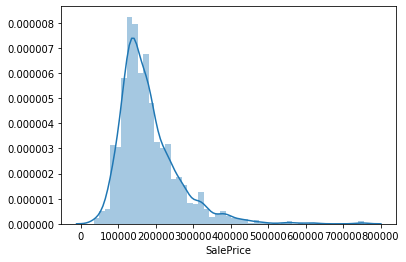

In [7]:
import seaborn as sns
sns.distplot(train['SalePrice'])

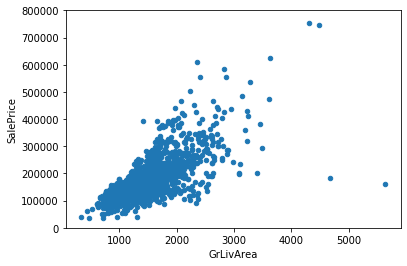

In [8]:
#scatter plot grlivarea/saleprice
var = 'GrLivArea'
data = pd.concat([train['SalePrice'], train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

#It seems that 'SalePrice' and 'GrLivArea' has a linear relationship.

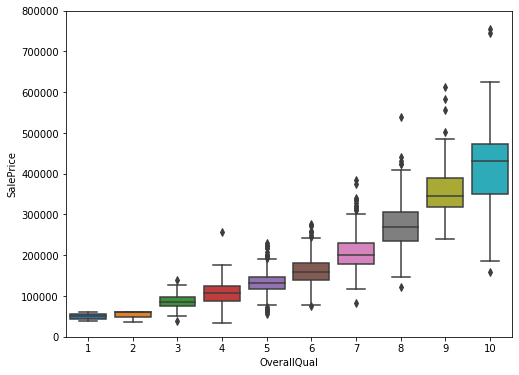

In [9]:
#box plot overallqual/saleprice
var = 'OverallQual'
data = pd.concat([train['SalePrice'], train[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

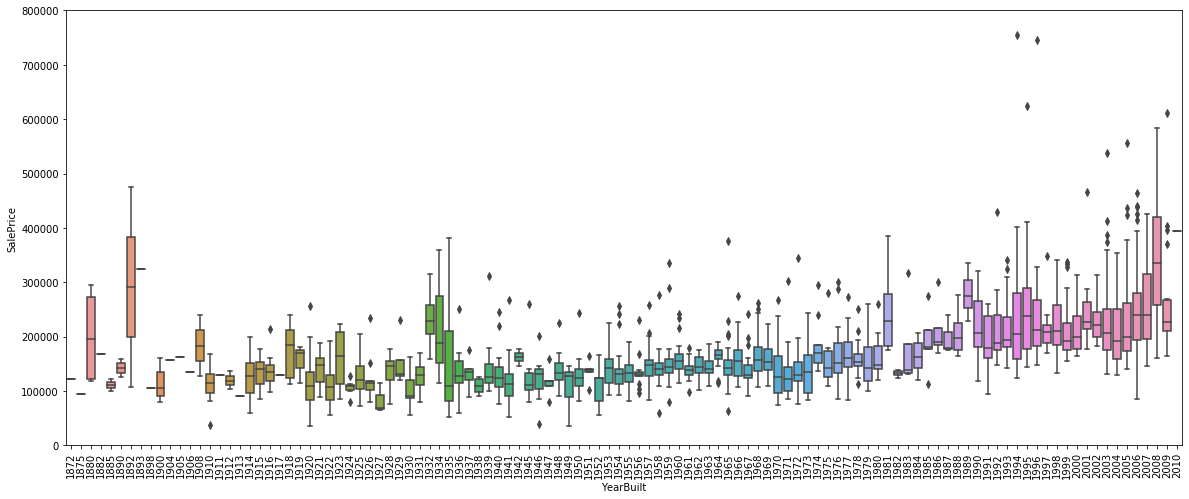

In [10]:
var = 'YearBuilt'
data = pd.concat([train['SalePrice'], train[var]], axis=1)
f, ax = plt.subplots(figsize=(20, 8))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);
plt.xticks(rotation=90);

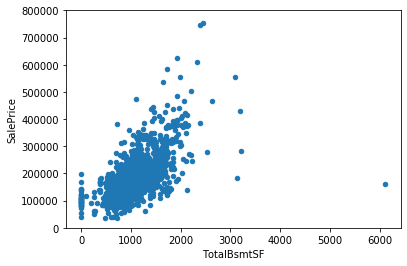

In [11]:
#scatter plot totalbsmtsf/saleprice
var = 'TotalBsmtSF'
data = pd.concat([train['SalePrice'], train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

In [12]:
'GrLivArea' and 'TotalBsmtSF' seem to be linearly related with 'SalePrice'. Both relationships are positive, 
which means that as one variable increases, the other also increases. In the case of 'TotalBsmtSF', we can see that 
the slope of the linear relationship is particularly high.
'OverallQual' and 'YearBuilt' also seem to be related with 'SalePrice'. The relationship seems t
o be stronger in the case of 'OverallQual', 
where the box plot shows how sales prices increase with the overall quality.

SyntaxError: invalid syntax (<ipython-input-12-221a7430b30d>, line 1)

In [ ]:
#scatterplot

cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(train[cols], size = 2.5)
plt.show();

In [ ]:
One of the figures we may find interesting is the one between 'TotalBsmtSF' and 'GrLiveArea'. 
In this figure we can see the dots drawing a linear line, which almost acts like a border.
It totally makes sense that the majority of the dots stay below that line. 
Basement areas can be equal to the above ground living area, but it is not expected a basement area bigger than 
the above ground living area (unless you're trying to buy a bunker).

In [ ]:
#missing data
total = train.isnull().sum().sort_values(ascending=False)
percent = (train.isnull().sum()/df.dropna(inplace=True)
print(df)train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

In [14]:
Q1 = train.quantile(0.25)
Q3 = train.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Id                 729.50
MSSubClass          50.00
LotFrontage         21.00
LotArea           4048.00
OverallQual          2.00
OverallCond          1.00
YearBuilt           46.00
YearRemodAdd        37.00
MasVnrArea         166.00
BsmtFinSF1         712.25
BsmtFinSF2           0.00
BsmtUnfSF          585.00
TotalBsmtSF        502.50
1stFlrSF           509.25
2ndFlrSF           728.00
LowQualFinSF         0.00
GrLivArea          647.25
BsmtFullBath         1.00
BsmtHalfBath         0.00
FullBath             1.00
HalfBath             1.00
BedroomAbvGr         1.00
KitchenAbvGr         0.00
TotRmsAbvGrd         2.00
Fireplaces           1.00
GarageYrBlt         41.00
GarageCars           1.00
GarageArea         241.50
WoodDeckSF         168.00
OpenPorchSF         68.00
EnclosedPorch        0.00
3SsnPorch            0.00
ScreenPorch          0.00
PoolArea             0.00
MiscVal              0.00
MoSold               3.00
YrSold               2.00
SalePrice        84025.00
dtype: float

In [15]:
print(train < (Q1 - 1.5 * IQR)) |(train > (Q3 + 1.5 * IQR))

      1stFlrSF  2ndFlrSF  3SsnPorch  Alley  BedroomAbvGr  BldgType  BsmtCond  \
0        False     False      False  False         False     False     False   
1        False     False      False  False         False     False     False   
2        False     False      False  False         False     False     False   
3        False     False      False  False         False     False     False   
4        False     False      False  False         False     False     False   
...        ...       ...        ...    ...           ...       ...       ...   
1455     False     False      False  False         False     False     False   
1456     False     False      False  False         False     False     False   
1457     False     False      False  False         False     False     False   
1458     False     False      False  False         False     False     False   
1459     False     False      False  False         False     False     False   

      BsmtExposure  BsmtFinSF1  BsmtFin

TypeError: cannot compare a dtyped [bool] array with a scalar of type [NoneType]

In [19]:
train_out =train[~((train < (Q1 - 1.5 * IQR)) |(train > (Q3 + 1.5 * IQR))).any(axis=1)]
train_out.shape

(563, 81)

In [21]:
train.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [25]:
#missing data
total = train.isnull().sum().sort_values(ascending=False)
percent = (train.isnull().sum()/train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


In [13]:
import numpy as np
x = np.array([[1,2,3],[4,5,6],[7,8,9]])
b = x.reshape(-1,1)
print(b)


[[1]
 [2]
 [3]
 [4]
 [5]
 [6]
 [7]
 [8]
 [9]]


In [22]:
print(x[1,1:3],x[2,1:3])

[5 6] [8 9]


In [ ]:
# Functions are first class objects in python or functions are first class citizens in python.

1) functions can be defined inside a function
2) A function can return a function.

In [10]:
def outer():
    
    
    def inner():
        x =3
        y =3
        result = x + y
        return result
    return inner()

a = outer()
print(a)

6


In [3]:
def outer():
    
    
    def inner():
        x =3
        y =3
        result = x + y
        return result
    return inner# without parenthesis it gives the reference or address of inner

a = outer()
print(a())

6


In [15]:
def outer():
    
    
    def inner():
        x =3
        y =3
        result = x + y
        return result
    return inner 

a = outer()
print(a()) # paretnhesis is missing in inner(line 9) ,we can add it in a()

6


In [11]:
def add():
    return "hello"
add()

'hello'

In [13]:
def outer():
    x =3
    def inner():
        y =3
        result = x + y
        return result
    return inner()
outer()



6

In [9]:
def function1():
    print("hi i am function 1")
    
def function2(a):
    print("hi i am function2 now i will call function 1")
    a()
    
    
    
    
    
function2(function1)



hi i am function2 now i will call function 1
hi i am function 1


In [30]:
def add(a,b):
    return a+b
c = add(4,5)
print(c)

9


In [11]:
#Decorators

def str_caps(func): # func is a function which passed as a parameter to str_caps, thats why we are calling func in inner(line3)
    def inner():
        str1 = func()
        return str1.upper() 
    return inner()



def print_str():
    return "good mng"

print(print_str()) # we have to write print statement bcoz otherwise the program goes to line 16 and print only GOOD MNG

d = str_caps(print_str)
print(d)







good mng
GOOD MNG


In [ ]:
def str_caps(a):# func is a function which passed as a parameter to str_caps, thats why we are calling func in inner(line3)
    b = a.upper() 
    print(b)
    
    
str_caps('z')

In [4]:
def str_upper(func):
    def inner():
        str1 = func()
        return str1.upper()
    return inner


@str_upper
def print_str():
    return "good mng"

print(print_str())

GOOD MNG


In [41]:
def str_caps(a):# func is a function which passed as a parameter to str_caps, thats why we are calling func in inner(line3)
    b = a.upper() 
    print(b)
    
    
str_caps('z')
    
    

   
       
        
   









Z
